# Lab 2

We have dealt with univariate data in module 1. All the datasets we looked into were multivariate but we were interested in analyzing individual variables, trying to do descriptive and inferential statistics and understanding how values are distributed etc. In this second lab, we will be focusing on dealing with multivariate data.

Univariate vs multivariate data differs only by number of dimensions of data. Multivariate can have two or more dimensions.  Often, more than one variable is collected in an experiment or any observation. For example, in a demographic study, many features such as age, sex, race, education, job, income level etc are included in the survey. The datasets will have more than two quantitative variables for each row or observation. Today, we will try to summarize the data just like how we summarized  univariate data in module 1.

Univariate exploration is not very useful when we have many variables in the dataset. Also, it just tells us how data is distributed. We should explore data with more powerful graphical approaches. Before we jump into the multivariate data analysis we should look into bivariate data. Bivariate as the name suggests is two dimensional data.

Let's start working with housing prices data of Kings county in Washington. The dataset is relatively big compared to previous ones we worked on. It contains information on house sale prices for King County, which includes Seattle. It has over 21k rows of data to play with. It has 21 dimensions with 2 non predictor variables id and date, 18 predictor variables and 1 response variable price. The discussion starts with bivariate data.

### Bivariate data


Bivariate data has two dimensions of data. We will consider abdominal circumference dataset which has three variables id, gawks and ac. The abdominal circumference(ac in the dataset) is modelled as a function of gestational age(gawks in the dataset) in weeks. We will summarize the data analogous to summarizing univariate (single variable) data in module 1.

Can we say, abdominal circumference varies with gestation period. As a general conception we can it is true. We can try to prove or disprove this assumption by analyzing the data. Read the dataset into a dataframe object called 'ac_data'.

In [1]:
ac_data=read.csv("../../../datasets/abdominal circumference/ac.csv")
head(ac_data)

id,gawks,ac
1,12.28571,59
2,12.28571,64
3,12.28571,56
4,12.42857,61
5,12.71429,74
6,12.71429,60


When you look at the first few rows you can't say for sure if long gestation periods will have more abdominal circumference. Lets get into descriptive statistics of the data.

In [2]:
summary(ac_data)

       id            gawks             ac       
 Min.   :  1.0   Min.   :12.29   Min.   : 56.0  
 1st Qu.:153.2   1st Qu.:20.00   1st Qu.:153.0  
 Median :305.5   Median :27.00   Median :227.0  
 Mean   :305.5   Mean   :27.27   Mean   :226.7  
 3rd Qu.:457.8   3rd Qu.:34.43   3rd Qu.:303.8  
 Max.   :610.0   Max.   :42.43   Max.   :404.0  

We are not sure if the data is normally distributed for both gawks and ac variables, but the data looks fine. There are no NA values.  Lets check the data type of variables using str() command.

In [3]:
str(ac_data)

'data.frame':	610 obs. of  3 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gawks: num  12.3 12.3 12.3 12.4 12.7 ...
 $ ac   : int  59 64 56 61 74 60 75 63 62 67 ...


We can try to summarize each variable using a histogram. But the 'ac' variable is integer type. You have seen in previous notebooks that we cannot plot a histogram for an integer variable. so lets convert its datatype to numeric first.

In [4]:
ac_data$ac=as.numeric(ac_data$ac)

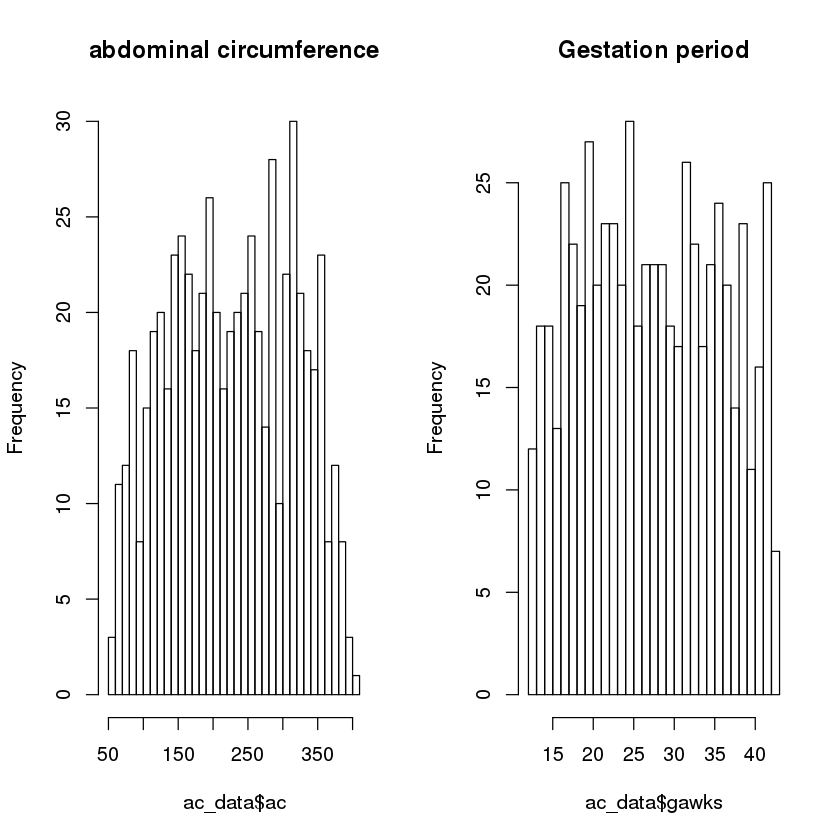

In [5]:
par(mfrow=(c(1,2)))
hist(ac_data$ac,breaks=25,main="abdominal circumference")
hist(ac_data$gawks,breaks=25,main="Gestation period")

The data is normally distributed, but histograms tell us nothing about the relationship between the two variables, if its linear or non linear or no relation at all. Scatter plots are the best way to visualize data to identify relationships.

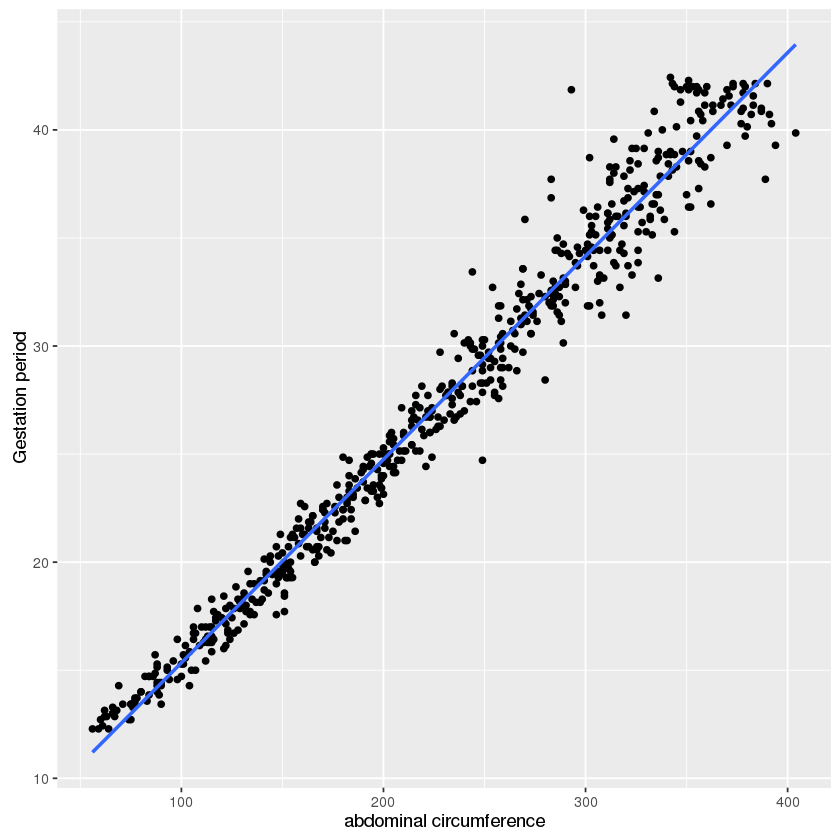

In [6]:
library(ggplot2)

ggplot(ac_data,aes(ac_data$ac,ac_data$gawks))+geom_point()+    
        geom_smooth(method=lm,   # Add linear regression line
                se=FALSE)  +  # Don't add shaded confidence region
xlab("abdominal circumference")+
ylab("Gestation period")

Above plot tells us there is absolutely a positive linear relationship between ac and gawks. So bivariate data analysis is identify relationships among variables. When there are just few features in a dataset you make visualizations to identify the relationships. But if there are 100 features we cant plot graphs for all of them. 

We will end up using numerical statistics when dimensions get large. So how do we know if two variables are related without plotting a graph against each other. There are functions in `R` which identifies/calculates how two variables are related. One of the common method/function to do that is discussed below.   

### Pearson correlation coefficient
----


The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strength of the relationship between the variables.

Pearson's r(symbol used to denote correlation coefficient) can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables.

To calculate the Pearson(linear) correlation coefficient for a pair of variables, you can use the “cor.test()” function in R.

##### Positive correlation


In [7]:
cor.test(ac_data$gawks,ac_data$ac)


	Pearson's product-moment correlation

data:  ac_data$gawks and ac_data$ac
t = 147.49, df = 608, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9839690 0.9883127
sample estimates:
      cor 
0.9863109 


The correlation coefficient which is about 0.9863109, is a very strong positive correlation. The P-value for the statistical test of whether the correlation coefficient is significantly different from zero is 02.2e-16 is very smaller than 0.05 (which is used as a cutoff for statistical significance). So there is very strong evidence that that the correlation is non-zero.

##### Negative correlation

When the correlation coefficient is negative then there would be negative correlation between variables. Again if the P-value is smaller than 0.05 (which is used as a cutoff for statistical significance) we can say correlation coefficient is different than 0.

##### Zero correlation

When the correlation coefficient is nearly equal to zero, there will bo no correlation between variables. The P-value will be larger than 0.05 indicating correlation is zero.

So the sign of the pearson's r value doesn't matter. Either positive or negative the r value tells us how much one variable can explain the variability in other variable. 

We have seen how to analyze bivariate data using scatter plots. We will advance our discussion into multivariate data analysis. You will generally start with univariate data analysis followed by bivariate data analysis before plotting complex 3d plots for multivariate data analysis. 

Lets start the discussion by loading housing prices data into a dataframe called `housing_prices`. 

### Loading data

In [9]:
housing_prices <- read.csv("../../../datasets/house_sales_in_king_county/kc_house_data.csv")

As usual lets take a quick look at the data, to make sure we read the data correctly into the dataframe.

In [10]:
head(housing_prices)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [10]:
#The structure of the dataframe as follows
str(housing_prices)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

Str() gave us an overall sense of the data. The data is a combination of numeric and integer variables. We will not be worried about id and data variables as they are non predictors. Lets dig deep into the data by doing some univariate analysis just like what we did in module 1. 

Run summary() on all variables

In [11]:
summary(housing_prices)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

Each variable has a different scale of values. Some range from 0 to 1 and some vary over long ranges. bedrooms looks interesting with a maximum value of 33. There could be possible outliers. We will look into that shortly. Bathrooms and floors have decimal values which doesn't make any sense. The data might be collceted from different sources and average number of bathrooms and floors are captured instead of individual correct integer values. We can't say anything now if that will effect our final model anyway.

### Univariate analysis

Lets go and plot histograms for all 18 variables and look into their distribution.

`gridExtra`: This R library helps you arrange multiple grid-based plots on a page, and draw tables. We are plotting 18 different histograms and arranging them in a grid. 

`ggplot2`: ggplot2 is commonly used package for doing visualizations. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends).

Loading required package: gridExtra


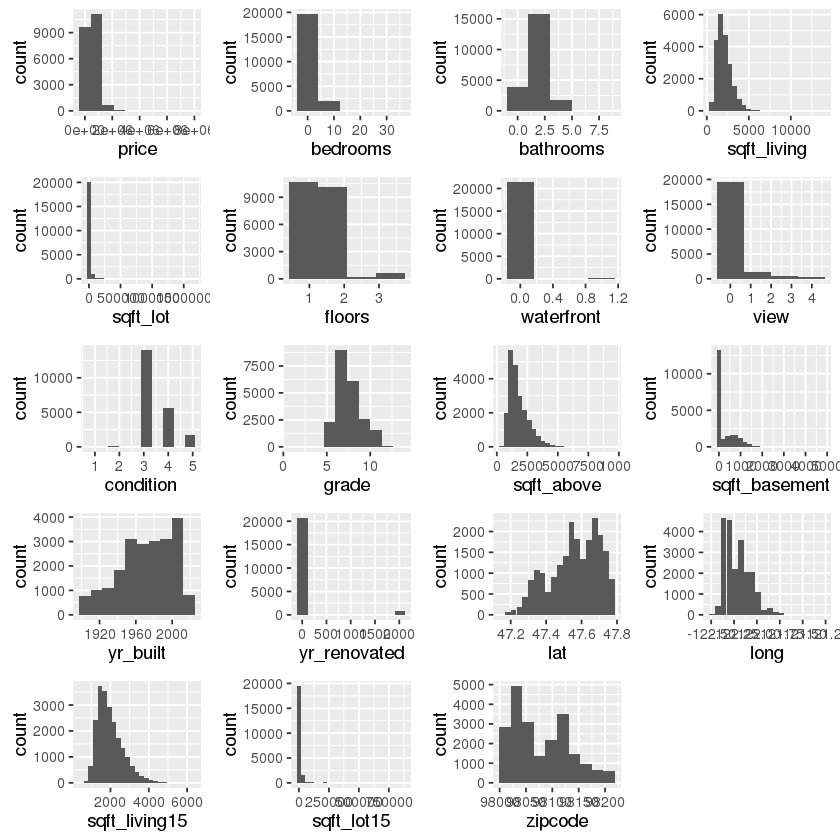

In [12]:
require(gridExtra)
require(ggplot2)

## grid.arrange(x1,x2,x3...xn,ncol=x,nrow=y)
## The command will arrange the plots x1,x2....xn in the desired outlet of specified rows and columns

# The number of bins should be chosen as appropriate. If you are not sure then trial and error is the best way to figure out the 
# right number of bins. Each bin will have observations equal to bin size. 

grid.arrange(qplot(housing_prices$price,bins = 10,xlab='price'),
             qplot(housing_prices$bedrooms,bins = 5,xlab='bedrooms'),
             qplot(housing_prices$bathrooms,bins = 5,xlab='bathrooms'),
             qplot(housing_prices$sqft_living,bins = 25,xlab='sqft_living'),
             qplot(housing_prices$sqft_lot,bins = 25,xlab='sqft_lot'),
             qplot(housing_prices$floors,bins = 4,xlab='floors'),
             qplot(housing_prices$waterfront,bins = 4,xlab='waterfront'),
             qplot(housing_prices$view,bins = 4,xlab='view'),
             qplot(housing_prices$condition,bins = 10,xlab='condition'),
             qplot(housing_prices$grade,bins = 10,xlab='grade'),
             qplot(housing_prices$sqft_above,bins = 25,xlab='sqft_above'),
             qplot(housing_prices$sqft_basement,bins = 25,xlab='sqft_basement'),
             qplot(housing_prices$yr_built,bins = 10,xlab='yr_built'),
             qplot(housing_prices$yr_renovated,bins = 10,xlab='yr_renovated'),
             qplot(housing_prices$lat,bins = 20,xlab='lat'),
             qplot(housing_prices$long,bins = 20,xlab='long'),
             qplot(housing_prices$sqft_living15,bins = 25,xlab='sqft_living15'),
             qplot(housing_prices$sqft_lot15,bins = 25,xlab='sqft_lot15'),
             qplot(housing_prices$zipcode,bins = 10,xlab='zipcode'),
             ncol = 4)

The table() command give us the distribution of the values.

In [13]:
table(housing_prices$bedrooms)
table(housing_prices$bathrooms)
table(housing_prices$floors)
table(housing_prices$view)
table(housing_prices$yr_renovated)


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 


   0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 
  10    4   72 3852    9 1446 3048 1930 2047 5380 1185  753  589  731  155  136 
4.25  4.5 4.75    5 5.25  5.5 5.75    6 6.25  6.5 6.75  7.5 7.75    8 
  79  100   23   21   13   10    4    6    2    2    2    1    1    2 


    1   1.5     2   2.5     3   3.5 
10680  1910  8241   161   613     8 


    0     1     2     3     4 
19489   332   963   510   319 


    0  1934  1940  1944  1945  1946  1948  1950  1951  1953  1954  1955  1956 
20699     1     2     1     3     2     1     2     1     3     1     3     3 
 1957  1958  1959  1960  1962  1963  1964  1965  1967  1968  1969  1970  1971 
    3     5     1     4     2     4     5     5     2     8     4     9     2 
 1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984 
    4     5     3     6     3     8     6    10    11     5    11    18    18 
 1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997 
   17    17    18    15    22    25    20    17    19    19    16    15    15 
 1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
   19    17    35    19    22    36    26    35    24    35    18    22    18 
 2011  2012  2013  2014  2015 
   13    11    37    91    16 

### Observations based on histograms

* Bedrooms: Bedrooms variable appears to have outliers but it could be a valid value. 

* Bathrooms and floors have decimal values which may not be correct. We cannot even make an assumption that those numbers are an average of number of bathrooms/floors in an area because there are single observations with values like 7.5, 7.75 for number of bathrooms.

* Year renovated: Not many houses are renovated. Most of the renovated houses are from 90's.

We have to identify independent variables that are related to our response variable price. Time for bivariate analysis. Bedrooms by default will be a major decider in price of a house. Plot a scatter plot between price and bedrooms and add a regression line.

ERROR: Error in +xlab("Bedrooms"): invalid argument to unary operator


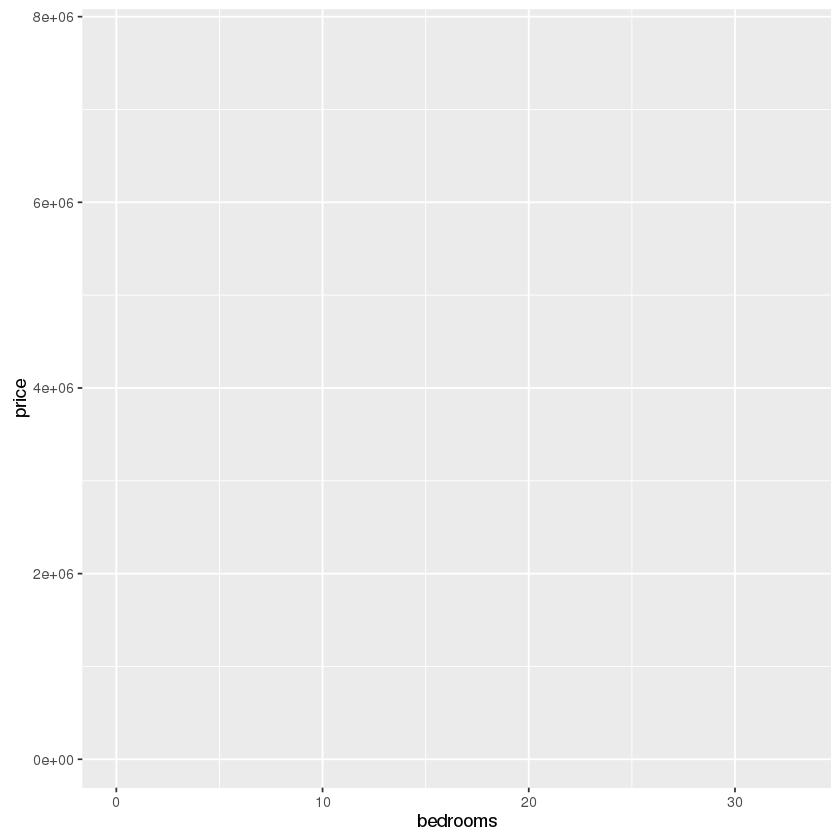

In [29]:
ggplot(housing_prices, aes(x=bedrooms,y=price)) 
  + xlab("Bedrooms")
  + ylab("Price") 
  + geom_point(aes(colour = view))
  + geom_smooth(method=lm)

33 bedrooms looks like an outlier. Because its price is similar to what a 4-bedroom house will cost. Look at that particular record in dataset by running the cell below. It just has 1.75 bathrooms, and 1620 sqft_living. 

In [11]:
housing_prices[housing_prices$bedrooms==33,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15871,2402100895,20140625T000000,640000,33,1.75,1620,6000,1,0,0,⋯,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Looks like the observation is an outlier. Lets remove it from the dataset.

In [12]:
housing_prices=housing_prices[!housing_prices$bedrooms %in% c(33),]

Lets generate scatter plots between price and all independent variables. 

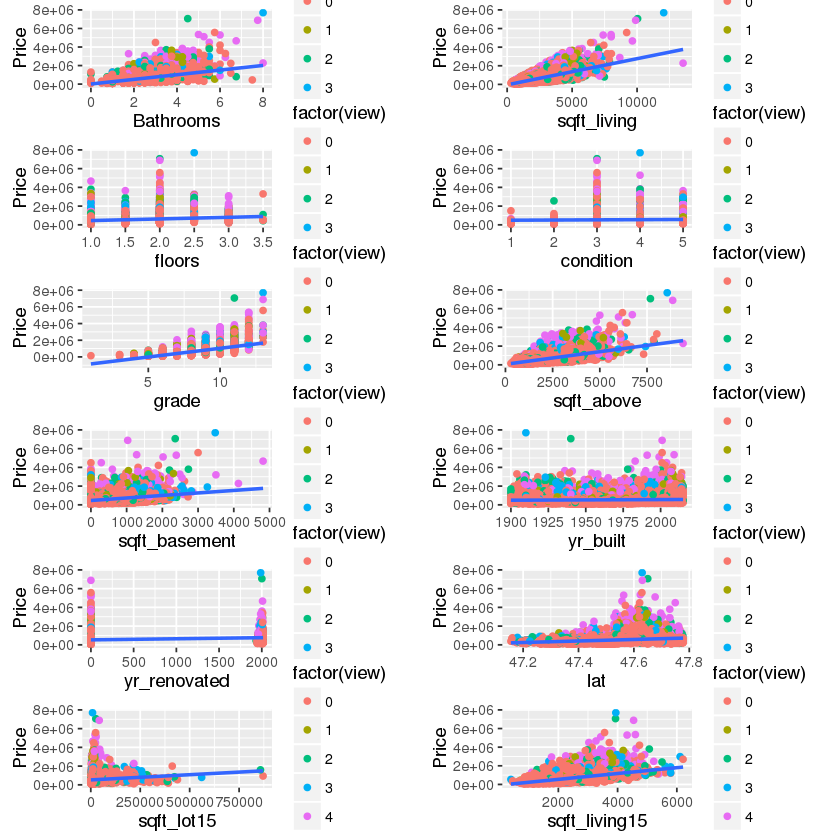

In [13]:
library(gridExtra)
library(ggplot2)
grid.arrange(
    
    ggplot(housing_prices, aes(x=bathrooms,y=price)) + xlab("Bathrooms")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_living,y=price)) + xlab("sqft_living")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=floors,y=price)) + xlab("floors")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=condition,y=price)) + xlab("condition")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=grade,y=price)) + xlab("grade")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_above,y=price)) + xlab("sqft_above")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_basement,y=price)) + xlab("sqft_basement")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=yr_built,y=price)) + xlab("yr_built")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=yr_renovated,y=price)) + xlab("yr_renovated")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=lat,y=price)) + xlab("lat")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_lot15,y=price)) + xlab("sqft_lot15")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    ggplot(housing_prices, aes(x=sqft_living15,y=price)) + xlab("sqft_living15")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm),
    
    
    ncol=2)

The plot price vs yr_renovated is hard to interpret, because out of 21k plus rows very few houses are renovated. So lets feed only data where the houses are renovated. 

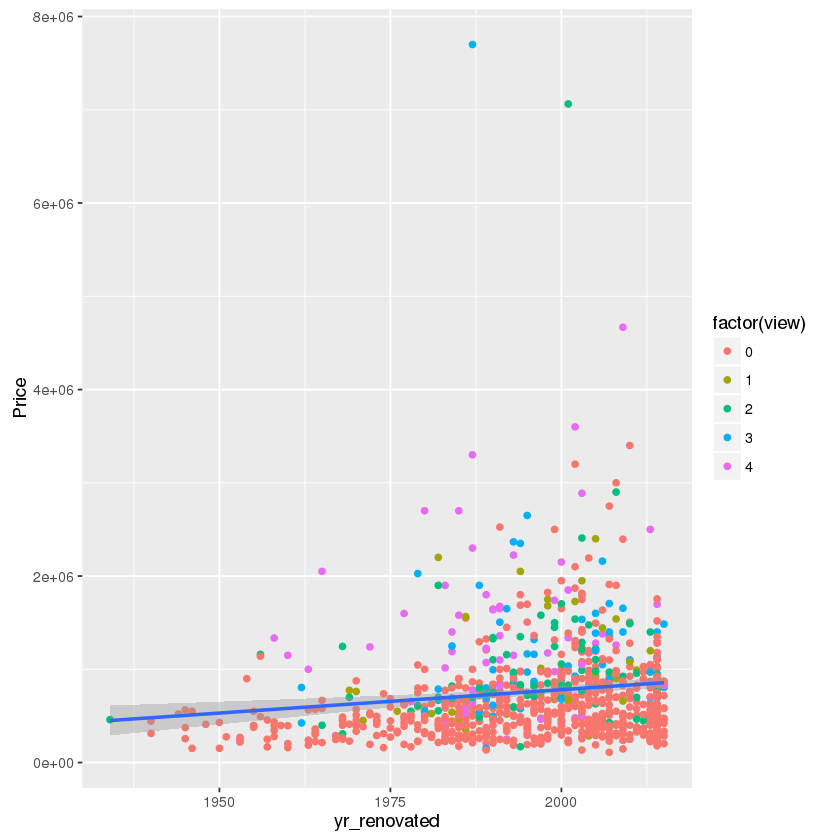

In [14]:
ggplot(subset(housing_prices,yr_renovated!=0), aes(x=yr_renovated,y=price)) + 
  xlab("yr_renovated")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm)

### Multivariate Plots Section

Bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_basement are varying linearly with price of the house. These might be the most decisive variables in predicting price of the house. floors, yr_built, yr_renovated, condition, lat and long tend to have positive relation with price. Lets plot condition and floors variables against price to look into them in detail. We will use view as another dimension in this plots. 

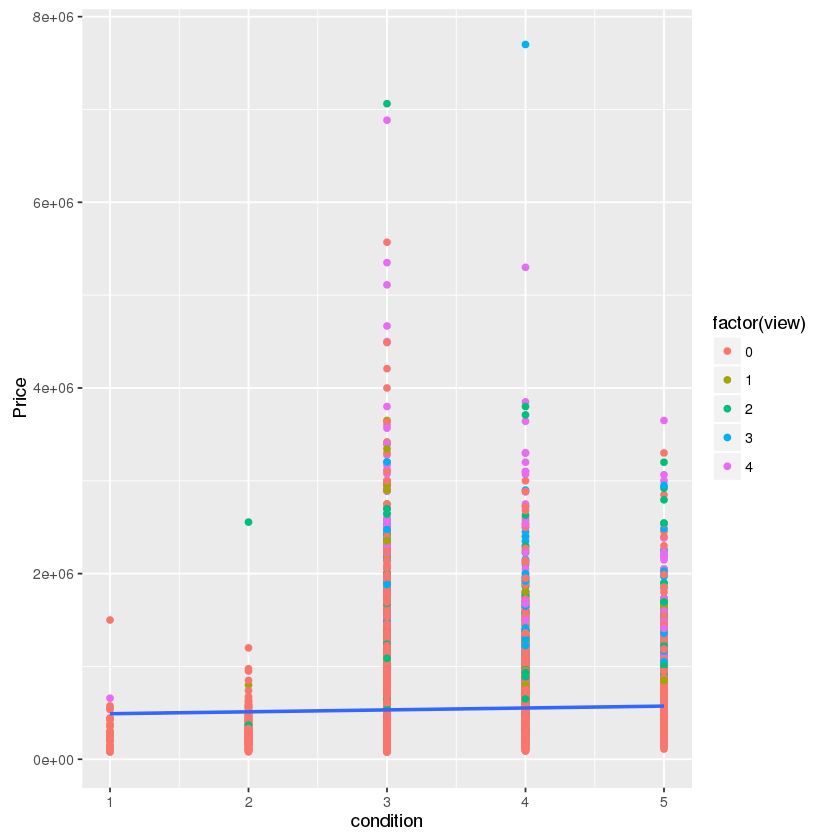

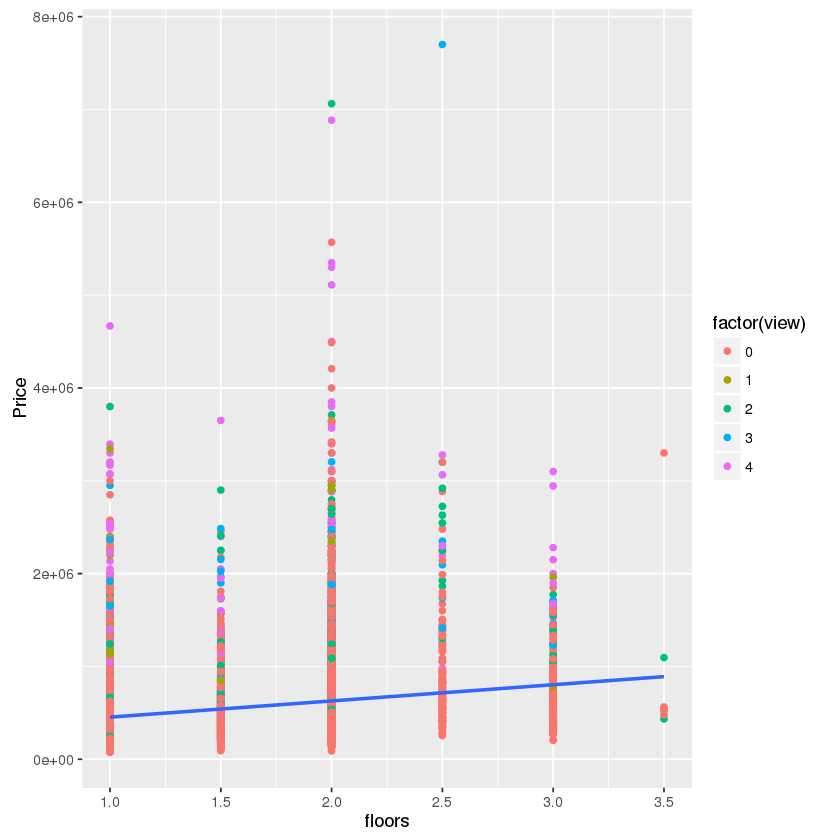

In [15]:
ggplot(housing_prices, aes(x=condition,y=price)) + xlab("condition")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm)
    
ggplot(housing_prices, aes(x=floors,y=price)) + xlab("floors")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm)

Condition is not varying much with price but floors is varying positively with price. Floors can be included in final model. We have Bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_basement, floors, yr_renovated as predictors. The relationship between lattitude, longitude and price could be interesting. We are not sure how they will vary all together. We cannot plot all three variables in a two dimensional plot. Lets plot a 3d plot to visualize the relationship.

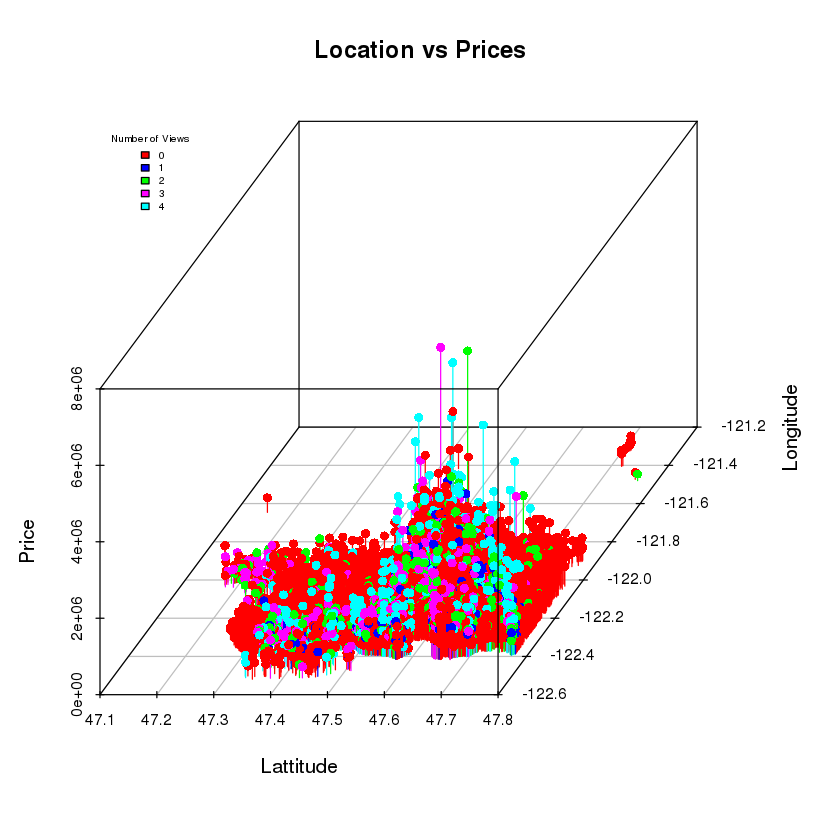

In [16]:
library(scatterplot3d)
#Assigning a color to each view
housing_prices$colors[housing_prices$view==0] <- "red"
housing_prices$colors[housing_prices$view==1] <- "blue"
housing_prices$colors[housing_prices$view==2] <- "green"
housing_prices$colors[housing_prices$view==3] <- "magenta"
housing_prices$colors[housing_prices$view==4] <- "cyan"


with(housing_prices, {
   scatterplot3d(lat, long, price,        # x y and z axis
                 type="h",             # lines to the horizontal plane
                 angle = 45,pch = 16,color=colors, #angle=45 denotes how graph is oriented, pch=16 denotes shape used to denote 
                                        #points on the plot,color=colors tells the graph to use colors variables defined above
                 main="Location vs Prices",        
                 xlab="Lattitude",
                 ylab="Longitude",
                 zlab="Price")

legend("topleft", inset=.05,      # location where the legend should be positioned on the graph
    bty="n", cex=.5,              # suppress legend box, shrink text 50%
    title="Number of Views", 
    c("0", "1", "2", "3", "4"), fill=c("red", "blue", "green", "magenta", "cyan"))
})

The plot is very difficult to interpret. We were hoping to see a pattern in the house prices with geographic coordinates data. You can rotate the angle of the graph from 45 to any degree 0 to 360, but it is of no use in this case. In which ever direction you rotate the graph, it is not easy to interpret the graph. The problem is number of data points are more and are clustered very close to each other. 

Since we have geographic location coordinates, we can try plotting the data on a google map. A google map may be more readable than the 3d plot we plotted above. We will use view as our third dimension again in below map. 

In [17]:
# install.packages("ggmap",repo="https://cran.cnr.berkeley.edu/")
library(ggmap)

#ggmap : This package has functions to visualize spatial data and models on top of static maps from various online sources 
#(e.g Google Maps and Stamen Maps). It includes tools common to those tasks, including functions for geolocation and routing.

#For example, you can get the lat, long coordinates of any place in the world you supply as argument to below function.
geocode("University of missouri columbia, Missouri")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20missouri%20columbia,%20Missouri&sensor=false


lon,lat
-90.31235,38.65987


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Kings+County,+Washington&zoom=9&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kings%20County,%20Washington&sensor=false


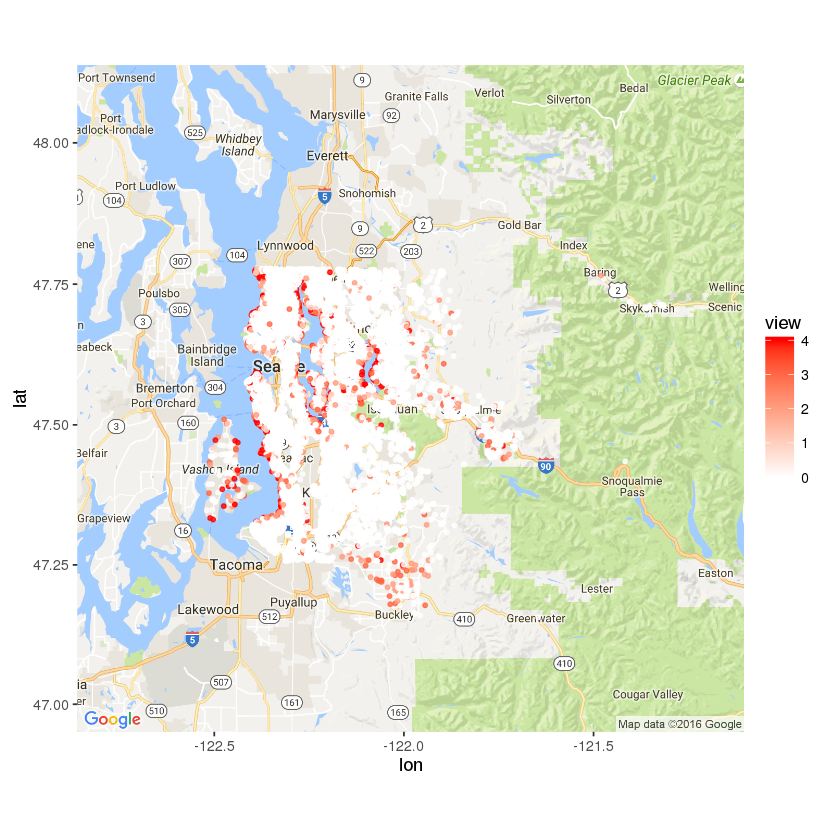

In [18]:
#get_map() will download the map from the source specified for the location you supplied as argument. There are different 
#options available for arguments source and maptype. We need the map for Kings county, Washington. 
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'roadmap',zoom = 9) 

#ggmap() function plots the actual map collected above. lat and long are labelled on the plot as x and y values. A view of 4 
#will be colored red while a view of 1 is colored white. The scale_colour_gradient() used below helps a smooth transition from 
#red to white color in case of different view levels(0 to 5).
ggmap(map) +  geom_point(data=housing_prices,aes(x = long,y = lat,color=view),size=1, alpha = 0.8) +
scale_colour_gradient( low="white", high="red", space="Lab")

Isn't it cool. Although above graph doesnt tell us anything about the price and its relation to lattitude, longitude or view variables it makes a lot of sense compared to above plot. All the houses near the river or lake has more views(3 or 4) and will be priced more compared to houses with less views as a general assumption. 

Lets plot only those houses whose price is greater than 2 million. We will use price as the 3rd dimension and views as 4th dimension.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Kings+County,+Washington&zoom=9&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kings%20County,%20Washington&sensor=false


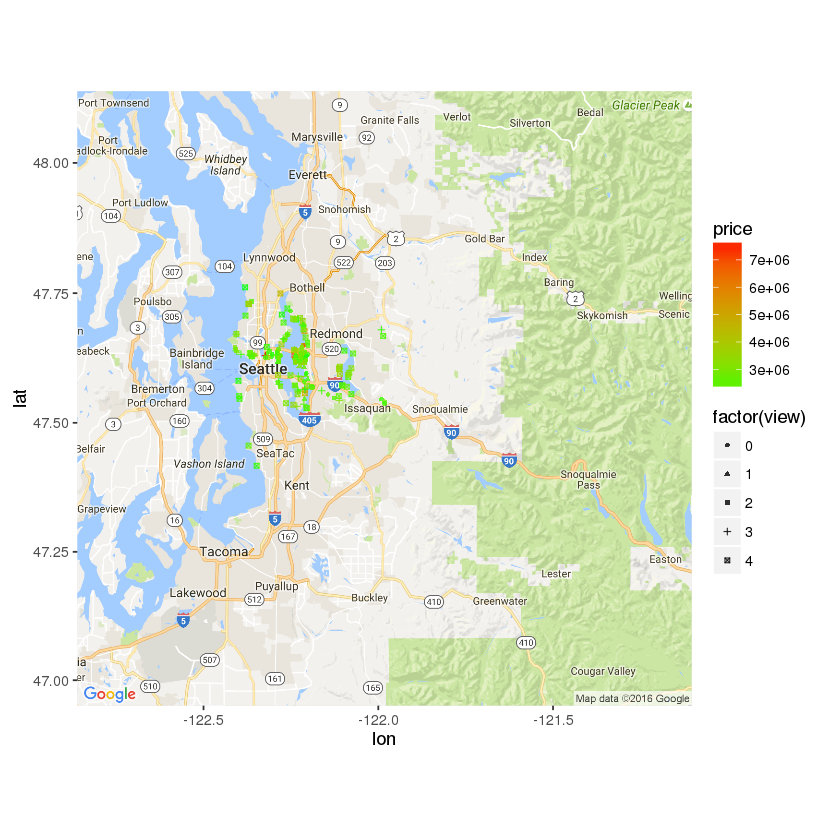

In [36]:
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'satellite',zoom = 9) 

#We are using dplyr function subset() here. "subset(housing_prices,housing_prices$price>2000000 )" is taking housing_prices 
#data and subsetting the records where price is > 2 million
ggmap(map) +  geom_point(data=subset(housing_prices,housing_prices$price>2000000 ),
                         aes(x = long,y = lat,color=price,shape=factor(view)),size=1, alpha = 0.8) +
                         scale_colour_gradient( low="green", high="red", space="Lab")

In [34]:
table(housing_prices$price>2000000)
table(housing_prices$price>4000000)
table(housing_prices$price>6000000)


FALSE  TRUE 
21415   198 


FALSE  TRUE 
21602    11 


FALSE  TRUE 
21610     3 

Run the cell above. In above plot we tried to plot houses with prices greater than `$2` million along with their respective number of views on the google map. As shown above there are only 198 houses with price greater than `$2` million, 11 houses with price greater than `$4` million and 3 houses with price greater than `$6` million. We used price as the third dimension in the form of color option and view is used as fourth dimension in the form of shape arguement. 

We were hoping to see more red symbols(higher price) than green. The data is skewed i'e there are not many houses with prices at the extreme end of 7.7 million. Most of the houses are in the range of 2 million to 3 million. Lets try to plot same plot again with price greater than 4 million.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Kings+County,+Washington&zoom=9&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kings%20County,%20Washington&sensor=false


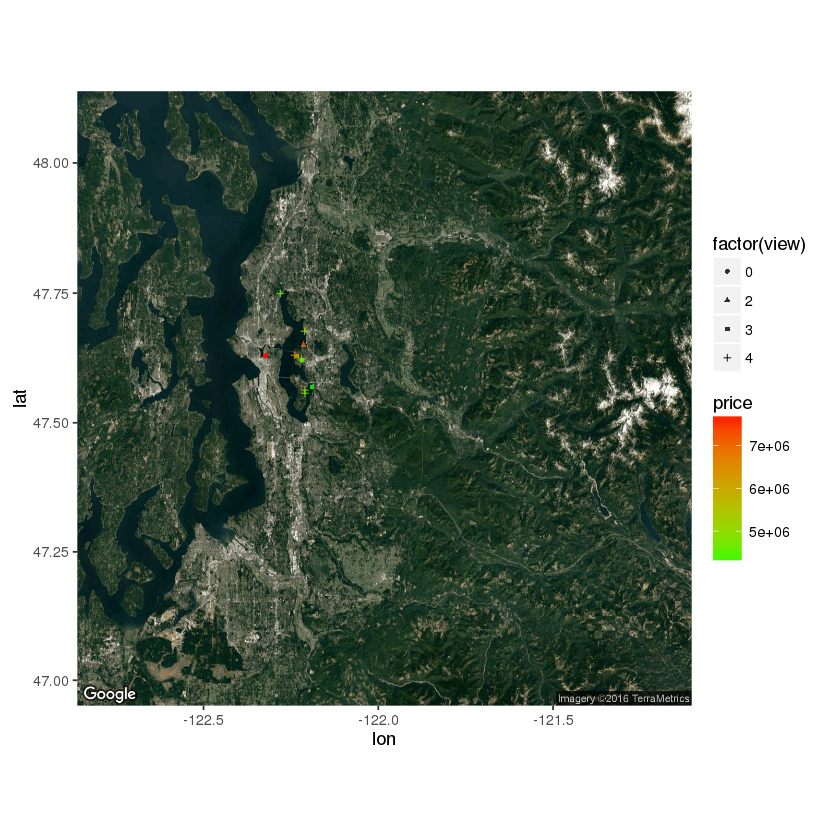

In [35]:
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'satellite',zoom = 9) 
ggmap(map) +  geom_point(data=subset(housing_prices,housing_prices$price>4000000 ),
                         aes(x = long,y = lat,color=price,shape=factor(view)),size=1, alpha = 0.8) +
                         scale_colour_gradient( low="green", high="red", space="Lab")

My assumption that high priced houses with have either 3 or 4 views is wrong. If you look at above plot, 3 houses have 0 views, 1 house with 2 views, 1 house with 3 views and 5 houses with 4 views. 

Of all the independent variables, sqft_living and bathrooms are the two variables which are related to price the most. They 
are varying the most with price. Both variables are numeric. We used price as our third dimension in above plot. You can use either bathrooms or sqft_living as the fourth dimension as size parameter as shown below. 

In [ ]:
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'satellite',zoom = 9) 
ggmap(map) +  geom_point(data=subset(housing_prices,housing_prices$price>2000000),
                         aes(x = long,y = lat,color=price,size=housing_prices$bathrooms),size=1,alpha = 0.8)+
                         scale_size_continuous(range=range(housing_prices$bathrooms)) +
                        scale_colour_gradient( low="white", high="red", space="Lab")

Above plot is not telling us anything from previous plots as the size of the points is not increasing with number of bathrooms. 

Can we add 5th dimension to the plot. May be one of view or sqft_living or grade or yr_renovated could be added as 5th dimension. The only option that is left is shape. The argument for shape parameter should be a factor and number of levels cannot exceed 6. grade or yr_renovated have more than 6 levels. sqft_living is numeric and has a long range of values. So we cannot use that feature as well. So we are stuck with view again as our 5th dimension. We can try different variables for color and size parameters though.

In below graph, we have two different plots for data with house prices greater than 2 million and views less than 3 and greater than or equal to 3. 

In [ ]:
library(gridExtra)
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'satellite',zoom = 9) 

plot1 = ggmap(map) +  
       geom_point(data=subset(housing_prices,price>2000000 & view>=3),
                  aes(x = long,y = lat,color=price,size=housing_prices$bathrooms,shape=factor(view)),size=1,alpha = 0.8)+
                  scale_size_continuous(range=range(housing_prices$bathrooms)) +
                  scale_colour_gradient( low="white", high="red", space="Lab")

plot2 = ggmap(map) +  
       geom_point(data=subset(housing_prices,price>2000000 & view<3),
                  aes(x = long,y = lat,color=price,size=housing_prices$bathrooms,shape=factor(view)),size=1,alpha = 0.8)+
                  scale_size_continuous(range=range(housing_prices$bathrooms)) +
                  scale_colour_gradient( low="white", high="red", space="Lab")

grid.arrange(plot1+xlim(-122.45,-122)+ ylim(47.4,47.75)+labs(title="Houses with price > $2M and views >= 3"),
             plot2+xlim(-122.45,-122)+ ylim(47.5,47.75)+labs(title="Houses with price > $2M and views < 3"),
             ncol=1)

Lets try to plot price vs bathrooms using grade and bedrooms as third and fourth dimensions in ggplot. Grade is used as size parameter, where the circle gets bigger with increasing grade. Bedrooms is our fourth dimension. AS the number of bedrooms increase the circle gets bigger. 

In [ ]:
# library(ggplot2)
ggplot(housing_prices, aes(x=bathrooms, y=price, size=grade, color=as.numeric(bedrooms))) + xlab("bathrooms") + ylab("price") +
  geom_point()

Again, if the number of observations are less the plot would have helped us in seeing trends in the data. We can see price is positively varying with number of bathrooms but we cannot form clear conclusions from bedrooms and grade. We are not able to see clear trends between price and bedrooms, grade.

We were able to use five dimensions lat, long, price, bathrooms, view in some of the plots above. But we want to see the effect of sqft_living on prices. Unfortunately we cant visualize it on the plot as we are running out of options. So there is a limit to the advantages of visualizations. We have to get back to numerical statistics to understand relations between features when the number of dimensions are more than a graph can handle.

### Descriptive statistics on Vectors

We tried to do descriptive statistics on data in the beginning using summary() function and bunch of histograms. Lets dive in a bit more explore into data exploration.

In [19]:
# Use sapply() to get means for all variables in data frame housing_prices
# Since we dont have na values in the data, we dont have to worry about excluding missing values. In case if you have any, 
#can do it by saying "na.rm=TRUE" as third parameter in below command.

#Also, date is a factor variable. You cannot apply mean() on it. We have to exclude it from dataframe.
sapply(housing_prices[,!names(housing_prices) %in% c('date','colors')], mean)

id         price      bedrooms     bathrooms   sqft_living 
 4.580402e+09  5.400835e+05  3.369471e+00  2.114774e+00  2.079921e+03 
     sqft_lot        floors    waterfront          view     condition 
 1.510739e+04  1.494332e+00  7.542106e-03  2.343143e-01  3.409356e+00 
        grade    sqft_above sqft_basement      yr_built  yr_renovated 
 7.656904e+00  1.788425e+03  2.914957e+02  1.971006e+03  8.440616e+01 
      zipcode           lat          long sqft_living15    sqft_lot15 
 9.807794e+04  4.756005e+01 -1.222139e+02  1.986583e+03  1.276883e+04

Subset the data based on yr_built and run summary on new sub datasets. subset1 should have data before year 1990(including 1990) and subset2 should have data with yr_built after 1990.

In [20]:
subset1=subset(housing_prices,yr_built <= 1990)
summary(subset1)

       id                         date           price            bedrooms     
 Min.   :1.200e+06   20140623T000000:  105   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.115e+09   20140626T000000:  100   1st Qu.: 300000   1st Qu.: 3.000  
 Median :3.888e+09   20150428T000000:   95   Median : 432000   Median : 3.000  
 Mean   :4.513e+09   20150414T000000:   90   Mean   : 509193   Mean   : 3.309  
 3rd Qu.:7.228e+09   20140625T000000:   89   3rd Qu.: 610000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20141028T000000:   88   Max.   :7700000   Max.   :11.000  
                     (Other)        :14368                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.000   1st Qu.: 1320   1st Qu.:   6000   1st Qu.:1.000  
 Median :1.750   Median : 1780   Median :   8160   Median :1.000  
 Mean   :1.875   Mean   : 1903   Mean   :  14823   Mean   :1.268  
 3rd Qu.:2.500   3rd Qu.:

In [21]:
subset2=subset(housing_prices,yr_built > 1990)
summary(subset2)

       id                         date          price            bedrooms     
 Min.   :1.000e+06   20140708T000000:  47   Min.   : 154000   Min.   : 0.000  
 1st Qu.:2.215e+09   20140729T000000:  47   1st Qu.: 360000   1st Qu.: 3.000  
 Median :4.014e+09   20140811T000000:  45   Median : 500000   Median : 3.000  
 Mean   :4.730e+09   20150427T000000:  44   Mean   : 609180   Mean   : 3.504  
 3rd Qu.:7.684e+09   20140617T000000:  43   3rd Qu.: 720000   3rd Qu.: 4.000  
 Max.   :9.895e+09   20141015T000000:  43   Max.   :6885000   Max.   :10.000  
                     (Other)        :6408                                     
   bathrooms      sqft_living       sqft_lot           floors   
 Min.   :0.000   Min.   :  384   Min.   :    572   Min.   :1.0  
 1st Qu.:2.500   1st Qu.: 1690   1st Qu.:   3610   1st Qu.:2.0  
 Median :2.500   Median : 2330   Median :   5876   Median :2.0  
 Mean   :2.651   Mean   : 2476   Mean   :  15744   Mean   :2.0  
 3rd Qu.:2.750   3rd Qu.: 3040   3rd Qu.:  

In [22]:
#one-way table.  
table(housing_prices$bedrooms)


   0    1    2    3    4    5    6    7    8    9   10   11 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1 

In [23]:
# Two-way table. Below command will produce a 2-way table with distribution count of every combination between bedrooms and price. 
#addmargins() will give the summary or sum of this counts at the end.
bed_vs_bath = table(housing_prices$bedrooms,housing_prices$bathrooms)
addmargins(bed_vs_bath)

,0,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,⋯,5.5,5.75,6,6.25,6.5,6.75,7.5,7.75,8,Sum
0,7,0,1,1,0,1,0,0,0,3,⋯,0,0,0,0,0,0,0,0,0,13
1,3,1,27,138,2,12,4,6,4,2,⋯,0,0,0,0,0,0,0,0,0,199
2,0,2,26,1558,3,294,304,216,118,197,⋯,0,0,0,0,0,0,0,0,0,2760
3,0,0,16,1780,4,829,1870,1048,1082,2357,⋯,0,0,0,0,0,0,0,0,0,9824
4,0,1,2,325,0,254,719,525,709,2502,⋯,5,1,0,0,0,0,0,0,0,6882
5,0,0,0,43,0,48,134,110,116,287,⋯,4,2,4,2,1,1,0,0,0,1601
6,0,0,0,6,0,6,16,24,15,29,⋯,0,0,1,0,1,0,0,1,1,272
7,0,0,0,1,0,2,0,0,3,2,⋯,1,1,0,0,0,1,0,0,1,38
8,0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,13
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,6


2-way tables are very informative. In above table, we have the distribution of bathrooms for every count of bedrooms. It is very detailed and the sums of columns and rows are displayed which indicate number of bedrooms or bathrooms with a specific number. 

Down below is an extended version of table command adding 3rd dimension to 2-way table. We can see same information as above but for every kind of view(0,1,2,3,4)

In [24]:
bed_bath_view <- xtabs(~bedrooms+bathrooms+view, data=housing_prices)
bed_bath_view

, , view = 0

        bathrooms
bedrooms    0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5
      0     5    0    1    1    0    1    0    0    0    3    0    0    0    0
      1     3    1   23  127    1   12    4    5    3    2    0    0    0    0
      2     0    2   20 1465    3  274  264  203  105  176   17   13    5    1
      3     0    0   15 1737    2  785 1717  964 1001 2164  216  156  147  113
      4     0    1    1  309    0  237  642  484  649 2329  543  277  186  298
      5     0    0    0   41    0   44  117  104  101  257  192  136   92  119
      6     0    0    0    6    0    6   15   22   12   26   19   43    7   15
      7     0    0    0    1    0    2    0    0    3    2    3    2    1    3
      8     0    0    0    0    0    0    0    0    0    1    3    2    1    0
      9     0    0    0    0    0    0    0    0    0    0    0    2    0    0
      10    0    0    0    0    0    0    0    1    0    0    0    1    0    0
      11    0    0  

Lets plot barplots using the table commands. Essentially bar plot works like a table command nternally.

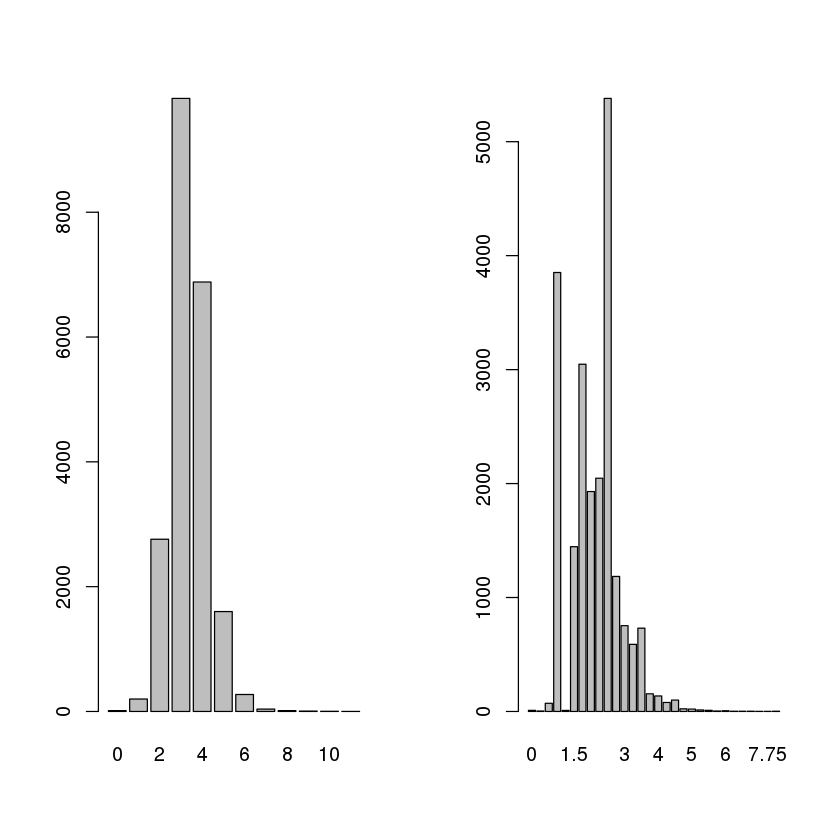

In [25]:
par(mfrow=c(1,2))
barplot(margin.table(bed_vs_bath,1))
barplot(margin.table(bed_vs_bath,2))

In [26]:
# install.packages("pastecs",repo="https://cran.cnr.berkeley.edu/")
library(pastecs)

Loading required package: boot


In [27]:
#The stat.desc() function gives an elaborate descriptive statistics of input object. Most of the statistics are well known and 
#commonly used.

stat.desc(housing_prices)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
nbr.val,2.161200e+04,NA,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,⋯,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,NA
nbr.null,0.000000e+00,NA,0.000000e+00,1.300000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.144900e+04,1.948800e+04,⋯,0.000000e+00,1.312600e+04,0.000000e+00,2.069800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NA
nbr.na,0.000000e+00,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NA
min,1.000102e+06,NA,7.500000e+04,0.000000e+00,0.000000e+00,2.900000e+02,5.200000e+02,1.000000e+00,0.000000e+00,0.000000e+00,⋯,2.900000e+02,0.000000e+00,1.900000e+03,0.000000e+00,9.800100e+04,4.715590e+01,-1.225190e+02,3.990000e+02,6.510000e+02,NA
max,9.900000e+09,NA,7.700000e+06,1.100000e+01,8.000000e+00,1.354000e+04,1.651359e+06,3.500000e+00,1.000000e+00,4.000000e+00,⋯,9.410000e+03,4.820000e+03,2.015000e+03,2.015000e+03,9.819900e+04,4.777760e+01,-1.213150e+02,6.210000e+03,8.712000e+05,NA
range,9.899000e+09,NA,7.625000e+06,1.100000e+01,8.000000e+00,1.325000e+04,1.650839e+06,2.500000e+00,1.000000e+00,4.000000e+00,⋯,9.120000e+03,4.820000e+03,1.150000e+02,2.015000e+03,1.980000e+02,6.217000e-01,1.204000e+00,5.811000e+03,8.705490e+05,NA
sum,9.899165e+13,NA,1.167229e+10,7.282100e+04,4.570450e+04,4.495125e+07,3.265009e+08,3.229550e+04,1.630000e+02,5.064000e+03,⋯,3.865145e+07,6.299805e+06,4.259739e+07,1.824186e+06,2.119660e+09,1.027868e+06,-2.641287e+06,4.293403e+07,2.759599e+08,NA
median,3.904930e+09,NA,4.500000e+05,3.000000e+00,2.250000e+00,1.910000e+03,7.619000e+03,1.500000e+00,0.000000e+00,0.000000e+00,⋯,1.560000e+03,0.000000e+00,1.975000e+03,0.000000e+00,9.806500e+04,4.757180e+01,-1.222300e+02,1.840000e+03,7.620000e+03,NA
mean,4.580402e+09,NA,5.400835e+05,3.369471e+00,2.114774e+00,2.079921e+03,1.510739e+04,1.494332e+00,7.542106e-03,2.343143e-01,⋯,1.788425e+03,2.914957e+02,1.971006e+03,8.440616e+01,9.807794e+04,4.756005e+01,-1.222139e+02,1.986583e+03,1.276883e+04,NA
SE.mean,1.956731e+07,NA,2.497344e+03,6.176318e-03,5.238936e-03,6.247572e+00,2.817588e+02,3.673153e-03,5.885250e-04,5.212792e-03,⋯,5.632905e+00,3.010546e+00,1.998068e-01,2.732383e+00,3.639611e-01,9.425481e-04,9.579563e-04,4.662211e+00,1.857337e+02,NA


From above table, we can see there are 13 rows of data where number of bedrooms are 0. Most of these rows also have no of bathrooms as 0. Lets take a look at this rows.

In [28]:
housing_prices[housing_prices$bedrooms==0,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
876,6306400140,20140612T000000,1095000,0,0.00,3064,4764,3.5,0,2,⋯,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,green
3120,3918400017,20150205T000000,380000,0,0.00,1470,979,3.0,0,2,⋯,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,green
3468,1453602309,20140805T000000,288000,0,1.50,1430,1650,3.0,0,0,⋯,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,red
4869,6896300380,20141002T000000,228000,0,1.00,390,5900,1.0,0,0,⋯,390,0,1953,0,98118,47.5260,-122.261,2170,6000,red
6995,2954400190,20140624T000000,1295650,0,0.00,4810,28008,2.0,0,0,⋯,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,red
8478,2569500210,20141117T000000,339950,0,2.50,2290,8319,2.0,0,0,⋯,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,red
8485,2310060040,20140925T000000,240000,0,2.50,1810,5669,2.0,0,0,⋯,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,red
9774,3374500520,20150429T000000,355000,0,0.00,2460,8049,2.0,0,0,⋯,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,red
9855,7849202190,20141223T000000,235000,0,0.00,1470,4800,2.0,0,0,⋯,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,red
12654,7849202299,20150218T000000,320000,0,2.50,1490,7111,2.0,0,0,⋯,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,red


Above rows of data seems outliers, there are no bedrooms for 13 rows and no bathrooms for some of them. Also, two rows have 
price greater than `$1` million. We can go ahead and delete them from the dataset.

In [29]:
housing_prices=housing_prices[!housing_prices$bedrooms %in% c(0),]

Lets see how the prices are varied using a five number summary function. Also we will draw a boxplot for price against view to show how boxplot gives five number summary

[1]   370.0  1428.5  1910.0  2550.0 13540.0

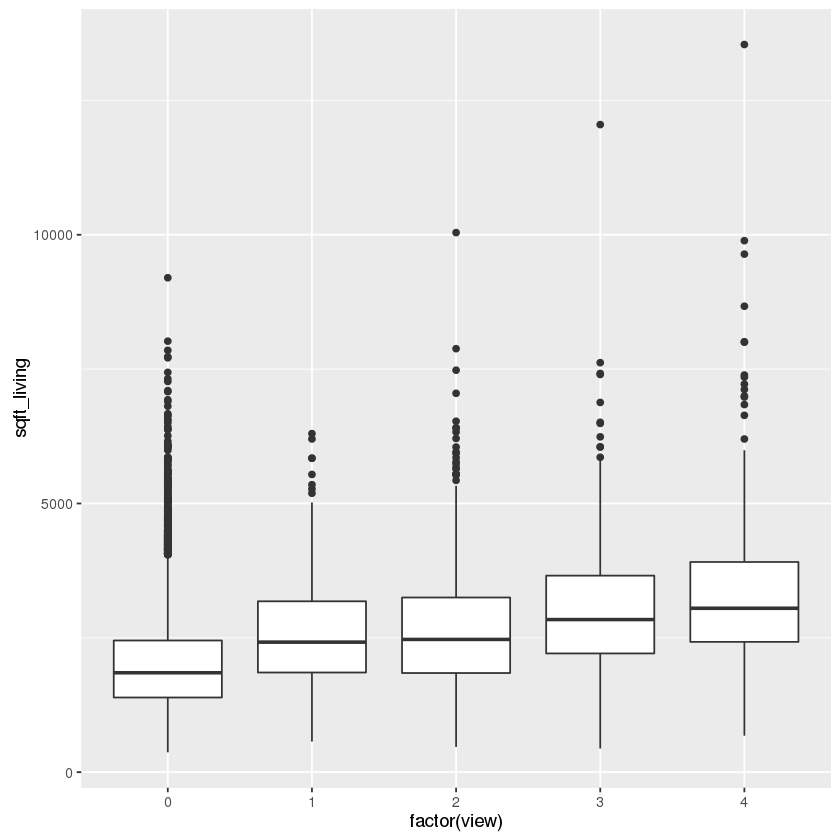

In [30]:
# Boxplot elements. Returns Tukey's five number summary (minimum, lower-hinge, median, upper-hinge, maximum)"
fivenum(housing_prices$sqft_living)

library(ggplot2)
ggplot(housing_prices, aes(factor(view), sqft_living)) + geom_boxplot()

In [31]:
which.max(housing_prices$price) # Determines the location, i.e., index of the (first) minimum or maximum of a numeric vector"

#similarly for which,min()

[1] 7248

In [32]:
# Mode by frequencies
# We have seen the use of table command before. Here we are trying to get teh best out of it. First we are trying to get the 
#distribution of all zip codes. Sort command will sort the counts in ascending order. So the '-' sign will get elements in 
#descending order. But we are interested in names or the zip codes instead of their counts. So, finall the names() function 
#will give us the names of maximum number of zip codes that appeared in the dataset. 
names(sort(-table(housing_prices$zipcode)))

[1] "98103" "98038" "98115" "98052" "98117" "98042" "98034" "98118" "98023"
[10] "98006" "98133" "98059" "98058" "98155" "98074" "98033" "98027" "98125"
[19] "98056" "98053" "98001" "98075" "98126" "98092" "98144" "98106" "98116"
[28] "98029" "98004" "98199" "98065" "98122" "98146" "98008" "98028" "98040"
[37] "98003" "98198" "98031" "98072" "98112" "98168" "98055" "98107" "98136"
[46] "98178" "98030" "98177" "98166" "98022" "98105" "98045" "98002" "98077"
[55] "98011" "98019" "98108" "98119" "98005" "98007" "98188" "98032" "98014"
[64] "98070" "98109" "98102" "98010" "98024" "98148" "98039"

In [33]:
# tapply()  Descriptive statistics by forming groups of data 
mean <- t(tapply(housing_prices$price,housing_prices$bedrooms, mean))
mean
# sd <- tapply(mydata$SAT,mydata$Gender, sd)

1,2,3,4,5,6,7,8,9,10,11
317642.9,401372.7,466232.1,635419.5,786599.8,825520.6,951184.7,1105077,893999.8,819333.3,520000


Above table gives the average price of the house against number of bedrooms in the house. The last two columns with number of bedrooms 11 and 33 seems like outliers. The price is very low compared to mean prices of 4 and 5 bedroom houses. We should look more in depth on 9 and 10 bedroom houses too. 

In [34]:
housing_prices[housing_prices$bedrooms>=9,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
4097,1997200215,20140507T000000,599999,9,4.50,3830,6988,2.5,0,0,⋯,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,red
4236,2902200015,20150106T000000,700000,9,3.00,3680,4400,2.0,0,0,⋯,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,red
6080,9822700190,20140808T000000,1280000,9,4.50,3650,5000,2.0,0,0,⋯,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,red
8547,424049043,20140811T000000,450000,9,7.50,4050,6504,2.0,0,0,⋯,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,red
8758,1773100755,20140821T000000,520000,11,3.00,3000,4960,2.0,0,0,⋯,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,red
13315,627300145,20140814T000000,1148000,10,5.25,4590,10920,1.0,0,2,⋯,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,green
15162,5566100170,20141029T000000,650000,10,2.00,3610,11914,2.0,0,0,⋯,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,red
16845,8823900290,20150317T000000,1400000,9,4.00,4620,5508,2.5,0,0,⋯,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,red
18444,8823901445,20150313T000000,934000,9,3.00,2820,4480,2.0,0,0,⋯,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,red
19255,8812401450,20141229T000000,660000,10,3.00,2920,3745,2.0,0,0,⋯,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,red


The prices of 9 and 10 bedroom houses look reasonable but casts shadow when we look at view, grade variables. Below is the definition for every grade. 


Grade represents the construction quality of improvements. Grades run from grade 1 to 13 and are defined as:

* 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

* 4 Generally older, low quality construction. Does not meet code.

* 5 Low construction costs and workmanship. Small, simple design.

* 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

* 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

* 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

* 9 Better architectural design with extra interior and exterior design and quality.

* 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

* 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

* 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

* 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

Definitions taken from http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


**Most of the houses are built long time ago and are not renovated. May be thats the reason for poor grade of the houses. **

In [35]:
#Aggregate works just like groupby in sql. Here we are grouping data based on bedrooms. WE are interested in columns price, 
#bathrooms and  sqft_living. Finally applying mean function on this subset of data for every group of data(i'e number of bedrooms)

aggregate(housing_prices[c("price","bathrooms","sqft_living")],by=list(bedrooms=housing_prices$bedrooms), mean)

bedrooms,price,bathrooms,sqft_living
1,317642.9,1.066583,884.6131
2,401372.7,1.401721,1239.7529
3,466232.1,1.968394,1805.8372
4,635419.5,2.436428,2554.6497
5,786599.8,2.778576,3047.5453
6,825520.6,3.068015,3284.3419
7,951184.7,3.651316,3974.2105
8,1105076.9,3.557692,3800.0000
9,893999.8,4.416667,3775.0000
10,819333.3,3.416667,3706.6667


In [36]:
#Below we are trying to aggregate data for price to show how bathrooms, bedrooms, sqft_living and view will help determine 
#the price.

price_analysis <- aggregate(housing_prices[c("price")],by=list(bedrooms=housing_prices$bedrooms, 
                            bathrooms=housing_prices$bathrooms, sqft_living=housing_prices$sqft_living, 
                            view=housing_prices$view), mean)
price_analysis <- price_analysis[order(price_analysis$price),]
head(price_analysis)

,bedrooms,bathrooms,sqft_living,view,price
52,1,0.00,670,0,75000
7,1,0.75,430,0,80000
17,2,1.00,520,0,82500
87,1,0.75,760,0,95000
24,1,1.00,560,0,98000
48,2,0.75,660,0,100000


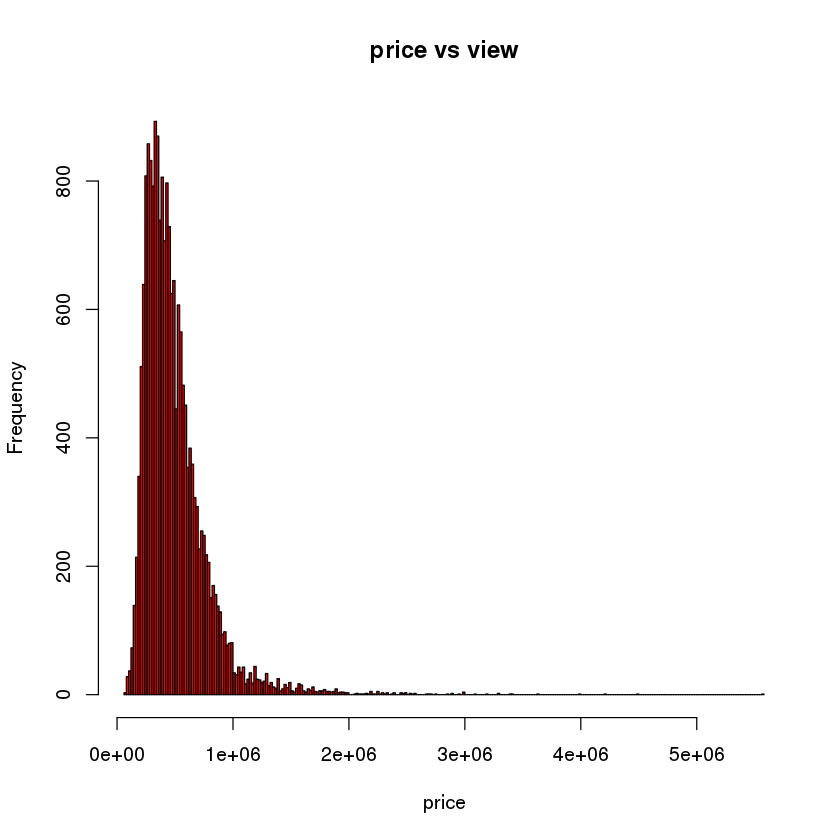

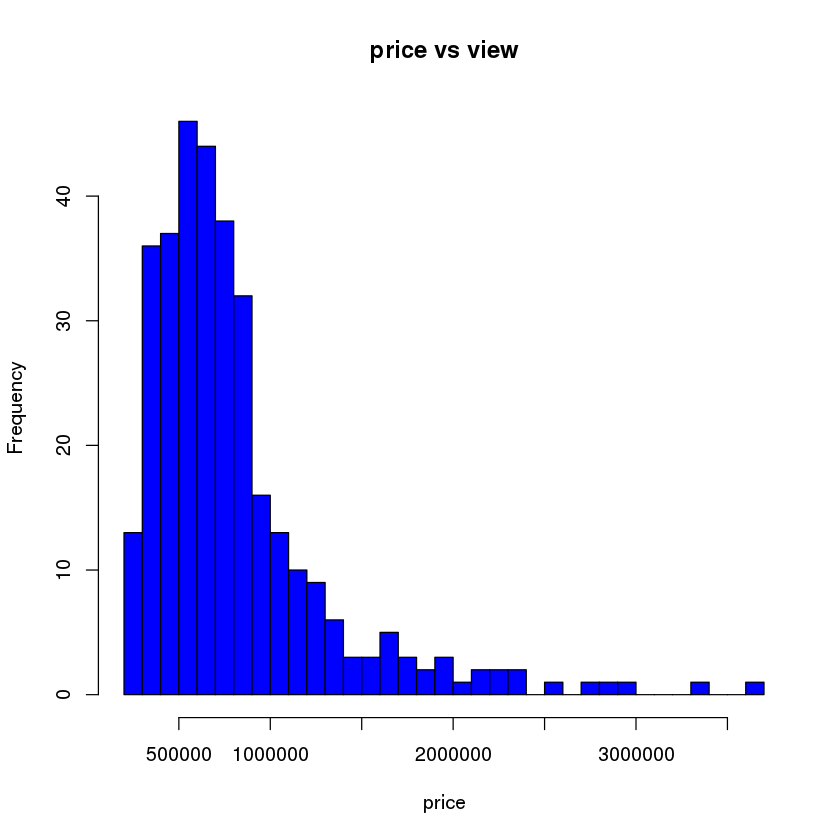

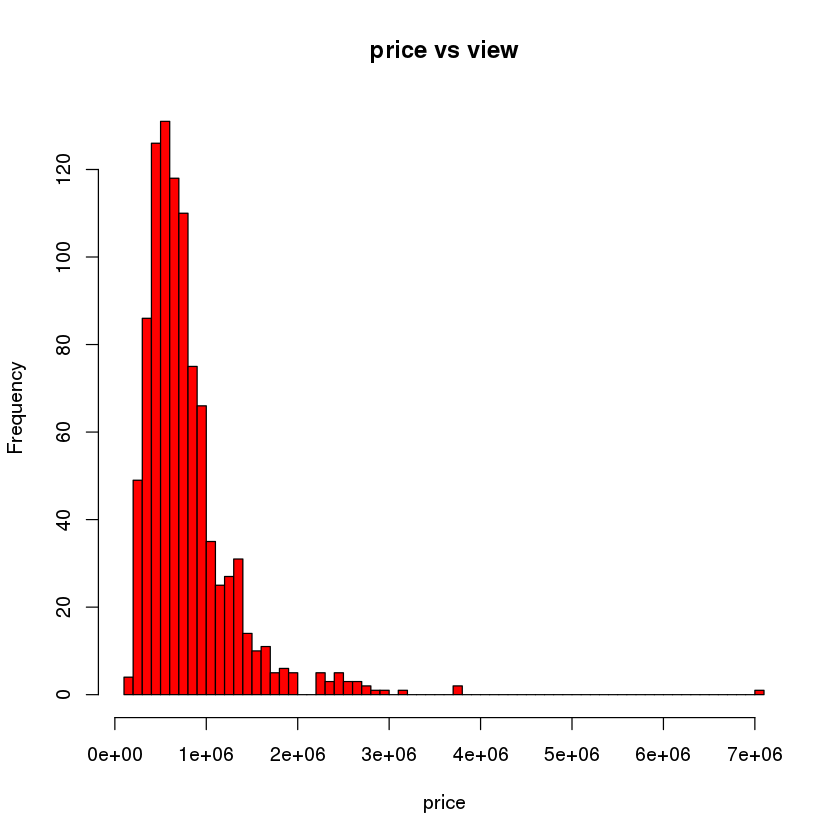

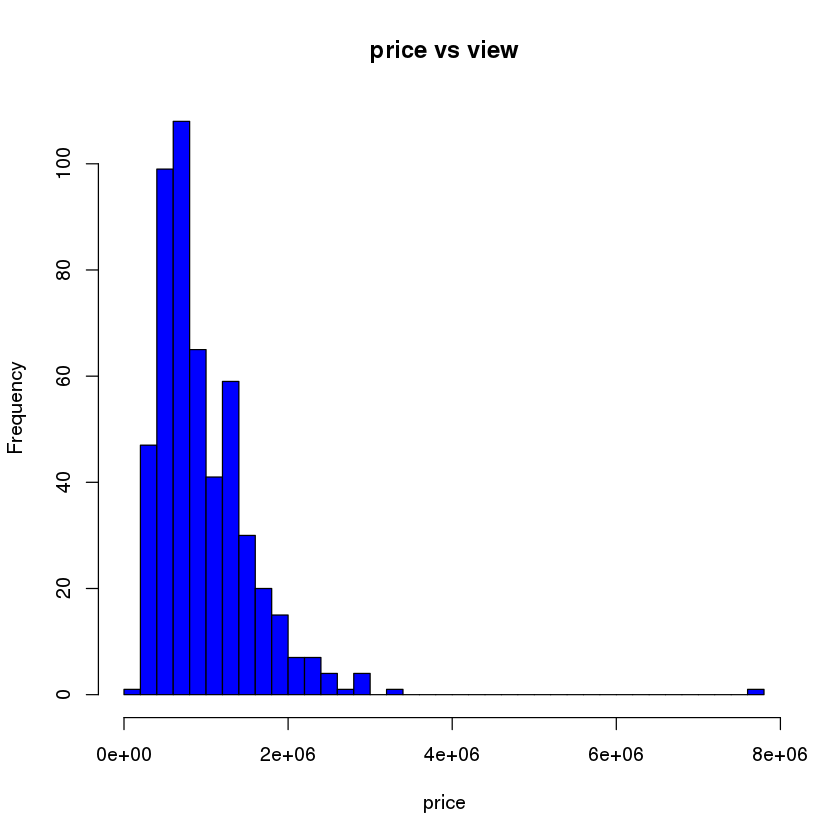

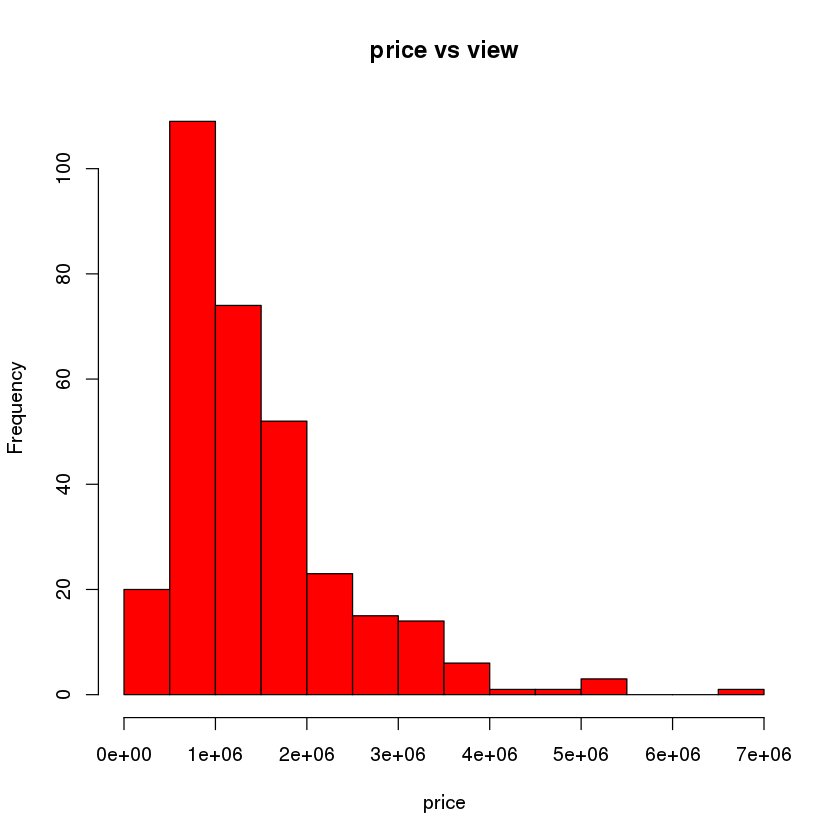

In [37]:
hist(housing_prices$price[housing_prices$view==0], breaks="FD", main="price vs view", xlab="price",col="red")
hist(housing_prices$price[housing_prices$view==1], breaks="FD", main="price vs view", xlab="price",col="blue")
hist(housing_prices$price[housing_prices$view==2], breaks="FD", main="price vs view", xlab="price",col="red")
hist(housing_prices$price[housing_prices$view==3], breaks="FD", main="price vs view", xlab="price",col="blue")
hist(housing_prices$price[housing_prices$view==4], breaks="FD", main="price vs view", xlab="price",col="red")